In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_excel('Upadte_data.xlsx',engine='openpyxl')
df2 = pd.read_csv('@NQC_NA_1 min_4years_25curdate_3curmonth_2025curyear.xlsx.csv')

In [3]:
df2.drop(columns=['Additional'],inplace=True)

In [4]:
df1

,Date,Timestamp,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Exit Reason,Profit/Loss,Trade Duration
0,01/14/21,16:00:00,Short,16:01:00,15048.75,02:50:00,15035.75,Chandelier Stop @ 15090.25,260,00:10:49:00
1,01/18/21,20:00:00,Long,20:07:00,15018.00,09:43:00,15435.25,Chandelier Stop @ 14948.75,8345,02:13:36:00
2,01/22/21,05:00:00,Short,05:01:00,15478.25,09:29:00,15493.75,Chandelier Stop @ 15504.25,-310,00:04:28:00
3,01/22/21,14:00:00,Short,14:55:00,15528.25,21:20:00,15606.75,Stop Loss @ 15606.00,-1570,02:06:25:00
4,01/25/21,03:00:00,Long,03:01:00,15627.50,10:52:00,15579.50,Stop Loss @ 15580.50,-960,00:07:51:00
...,...,...,...,...,...,...,...,...,...,...
68,2021-06-05 00:00:00,12:00:00,Long,12:01:00,15707.25,13:54:00,15659.00,Stop Loss @ 15660.25,-965,00:01:53:00
69,2021-10-05 00:00:00,10:00:00,Short,10:01:00,15697.25,12:13:00,15697.25,Chandelier Stop @ 15699.75,0,00:02:12:00
70,2021-11-05 00:00:00,14:00:00,Long,14:01:00,15496.25,20:41:00,15449.00,Stop Loss @ 15449.75,-945,00:06:40:00
71,2021-12-05 00:00:00,09:00:00,Short,09:01:00,15318.75,22:52:00,15223.25,Chandelier Stop @ 15369.75,1910,00:13:51:00


In [5]:
df2 = df2.loc[:1414304]

Working With Data -2 Where i just use the previous algorithm

In [6]:
df2['date'] = pd.to_datetime(df2['date'])

In [7]:
df2.head()

,date,High,Low,Open,Close,Volume,PeriodVolume
0,2021-03-26 04:01:00,14986.25,14974.50,14984.75,14983.00,46768.0,427.0
1,2021-03-26 04:02:00,14992.75,14982.25,14982.50,14990.00,47101.0,333.0
2,2021-03-26 04:03:00,14993.25,14989.25,14990.25,14990.75,47346.0,245.0
3,2021-03-26 04:04:00,14992.25,14987.00,14990.00,14988.25,47548.0,202.0
4,2021-03-26 04:05:00,14989.75,14984.50,14988.00,14985.00,47689.0,141.0


In [8]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=d15a5720d5f4e93d272aac2012ebfdebd236aa9aef7be054d715156d69821e12
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [9]:
import ta
atr_period = 9
df2['atr'] = ta.volatility.AverageTrueRange(df2['High'], df2['Low'], df2['Close'],window=atr_period).average_true_range()


In [10]:
df2['Chandelier_Long'] = df2["High"].rolling(window=atr_period).max() - df2['atr']*3.9
df2['Chandelier_Short'] = df2["Low"].rolling(window=atr_period).min() + df2['atr']*1.5

In [11]:
df2["Exit_Long"] = df2["Close"] < df2["Chandelier_Long"]
df2["Exit_Short"] = df2["Close"] > df2["Chandelier_Short"]


In [12]:
df2.head()

,date,High,Low,Open,Close,Volume,PeriodVolume,atr,Chandelier_Long,Chandelier_Short,Exit_Long,Exit_Short
0,2021-03-26 04:01:00,14986.25,14974.50,14984.75,14983.00,46768.0,427.0,0.0,NaN,NaN,False,False
1,2021-03-26 04:02:00,14992.75,14982.25,14982.50,14990.00,47101.0,333.0,0.0,NaN,NaN,False,False
2,2021-03-26 04:03:00,14993.25,14989.25,14990.25,14990.75,47346.0,245.0,0.0,NaN,NaN,False,False
3,2021-03-26 04:04:00,14992.25,14987.00,14990.00,14988.25,47548.0,202.0,0.0,NaN,NaN,False,False
4,2021-03-26 04:05:00,14989.75,14984.50,14988.00,14985.00,47689.0,141.0,0.0,NaN,NaN,False,False


In [13]:
start_date = df2['date'].min()
end_date = df2['date'].max()
print(f"Data covers from {start_date} to {end_date}")

Data covers from 2021-03-26 04:01:00 to 2021-07-28 22:12:00


In [14]:
df3 = df2[:1000]

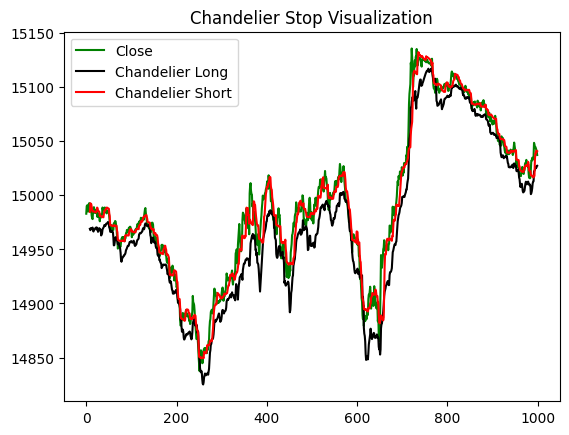

In [15]:
plt.plot(df3['Close'], label='Close',color='green')
plt.plot(df3['Chandelier_Long'], label='Chandelier Long',color ='black')
plt.plot(df3['Chandelier_Short'], label='Chandelier Short',color = 'red')
plt.legend()
plt.title("Chandelier Stop Visualization")
plt.show()

Working With Data-1 To find the Algo

In [16]:
df1['Date'] = pd.to_datetime(df1['Date'])

<ipython-input-16-695a7991ba53>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [17]:
df_ = df1[df1['Exit Reason'].str.contains('Chandelier Stop', na=False)].copy()

# Extract the numeric value after '@' and store in new column
df_['chandelier_value'] = df_['Exit Reason'].str.extract(r'@ (\d+\.?\d*)').astype(float)
df_.head(3)

,Date,Timestamp,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Exit Reason,Profit/Loss,Trade Duration,chandelier_value
0,2021-01-14,16:00:00,Short,16:01:00,15048.75,02:50:00,15035.75,Chandelier Stop @ 15090.25,260,00:10:49:00,15090.25
1,2021-01-18,20:00:00,Long,20:07:00,15018.00,09:43:00,15435.25,Chandelier Stop @ 14948.75,8345,02:13:36:00,14948.75
2,2021-01-22,05:00:00,Short,05:01:00,15478.25,09:29:00,15493.75,Chandelier Stop @ 15504.25,-310,00:04:28:00,15504.25


In [18]:
df_['Entry Time'] = pd.to_datetime(df_['Entry Time'],format='%H:%M:%S').dt.time
df_['Exit Time'] = pd.to_datetime(df_['Exit Time'],format='%H:%M:%S').dt.time

In [19]:
from datetime import datetime,timedelta

In [20]:
df_['Entry_datetime'] = df_.apply(lambda row: datetime.combine(row['Date'], row['Entry Time']), axis=1)

In [21]:
df_['Exit_datetime'] = df_.apply(lambda row: datetime.combine(row['Date'], row['Exit Time']), axis=1)

In [22]:
df_.head(3)

,Date,Timestamp,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Exit Reason,Profit/Loss,Trade Duration,chandelier_value,Entry_datetime,Exit_datetime
0,2021-01-14,16:00:00,Short,16:01:00,15048.75,02:50:00,15035.75,Chandelier Stop @ 15090.25,260,00:10:49:00,15090.25,2021-01-14 16:01:00,2021-01-14 02:50:00
1,2021-01-18,20:00:00,Long,20:07:00,15018.00,09:43:00,15435.25,Chandelier Stop @ 14948.75,8345,02:13:36:00,14948.75,2021-01-18 20:07:00,2021-01-18 09:43:00
2,2021-01-22,05:00:00,Short,05:01:00,15478.25,09:29:00,15493.75,Chandelier Stop @ 15504.25,-310,00:04:28:00,15504.25,2021-01-22 05:01:00,2021-01-22 09:29:00


In [23]:
def correct_exit_datetime(entry_datetime,exit_datetime):

    # If exit appears earlier than entry, assume it's on the next day
    if exit_datetime < entry_datetime:
        exit_datetime += timedelta(days=1)

    return exit_datetime


In [24]:
df_['Exit_datetime'] = df_.apply(lambda row: correct_exit_datetime(row['Entry_datetime'], row['Exit_datetime']), axis=1)


In [25]:
from datetime import timedelta


def generate_exit_checkpoints(entry_datetime, exit_datetime, max_hours=10):
    checkpoints = []
    # Go backward from exit time until you reach entry time or max_hours
    for i in range(max_hours):
        checkpoint = exit_datetime - timedelta(hours=i)
        if checkpoint > entry_datetime:
            checkpoints.append(checkpoint)
        else:
            break

    return checkpoints


In [26]:
df_['checkpoints'] = df_.apply(lambda row: generate_exit_checkpoints(row['Entry_datetime'],row['Exit_datetime']),axis=1)

In [27]:
sample = df_[['Entry_datetime','Exit_datetime','checkpoints']].loc[2]
print(sample['Entry_datetime'])
print(sample['Exit_datetime'])
print(sample['checkpoints'])

2021-01-22 05:01:00
2021-01-22 09:29:00
[Timestamp('2021-01-22 09:29:00'), Timestamp('2021-01-22 08:29:00'), Timestamp('2021-01-22 07:29:00'), Timestamp('2021-01-22 06:29:00'), Timestamp('2021-01-22 05:29:00')]


In [28]:
df_.drop(columns=['Exit Reason'],inplace=True)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_trade_checkpoints(df, trade_index):
    row = df.iloc[trade_index]
    checkpoints = row['checkpoints']
    chandelier = row['chandelier_value']
    entry_time = row['Entry_datetime']
    exit_time = row['Exit_datetime']
    direction = row['Direction']

    plt.figure(figsize=(12, 4))

    # Plot checkpoints
    plt.plot(checkpoints, [chandelier]*len(checkpoints), 'bo-', label='Checkpoints (Chandelier)')

    # Entry and exit markers
    plt.axvline(entry_time, color='green', linestyle='--', label='Entry Time')
    plt.axvline(exit_time, color='red', linestyle='--', label='Exit Time')

    # Add annotation
    plt.title(f'Trade #{trade_index} - {direction}')
    plt.xlabel("Datetime")
    plt.ylabel("Price (Chandelier Proxy)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


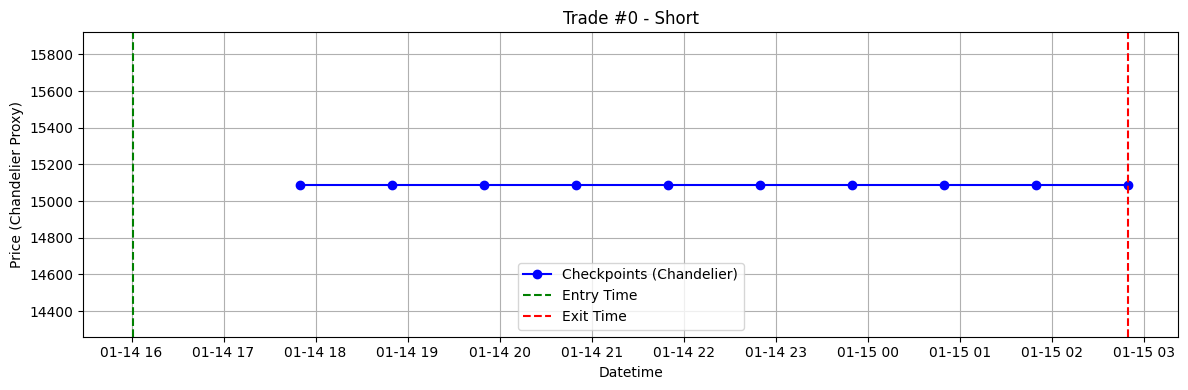

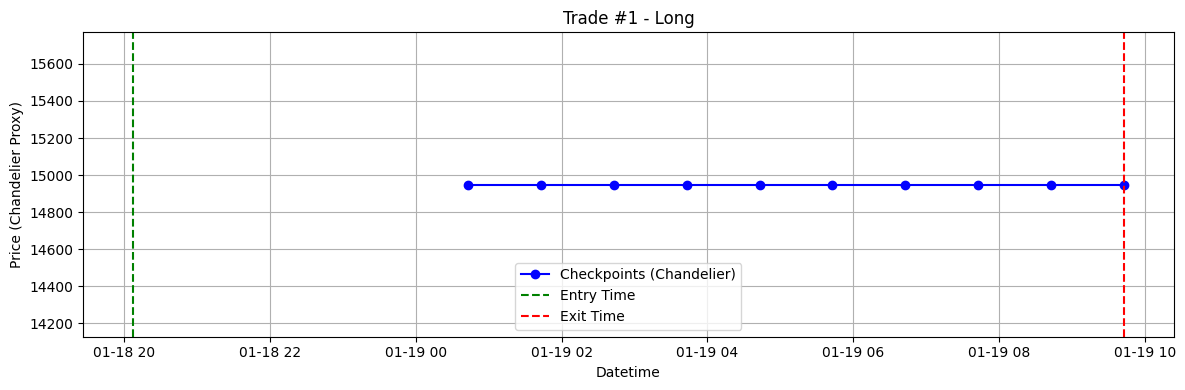

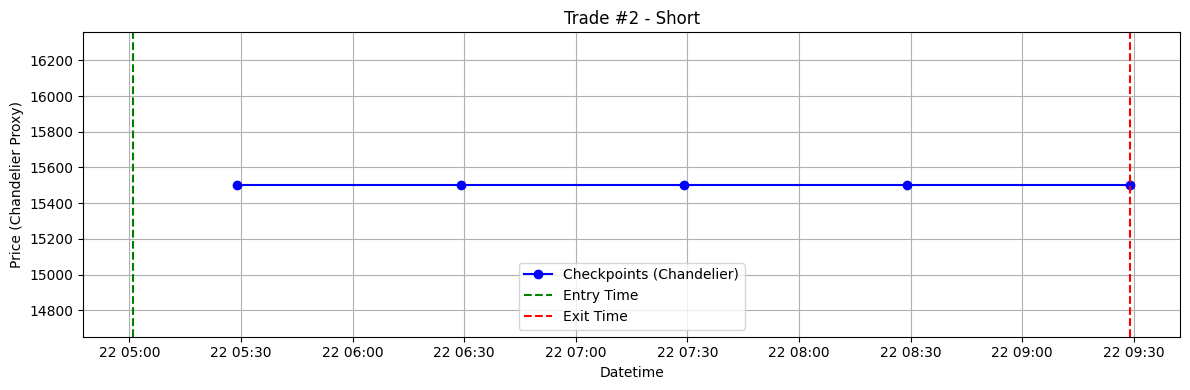

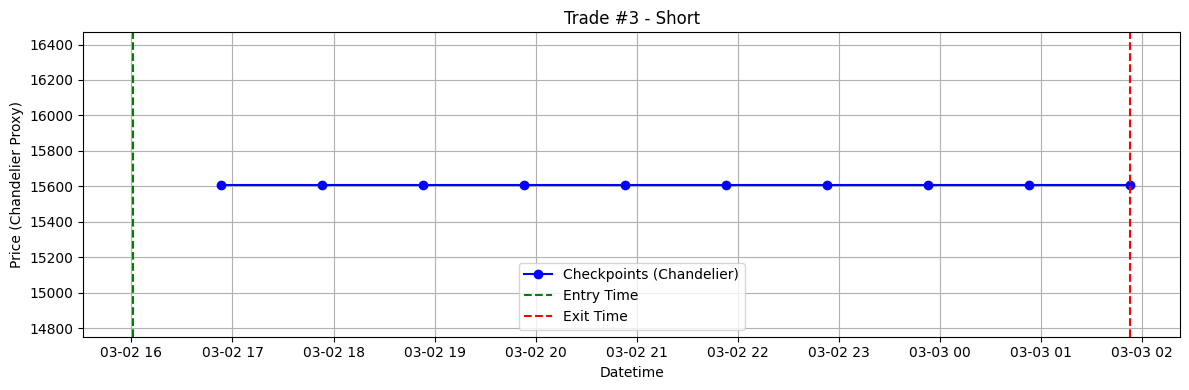

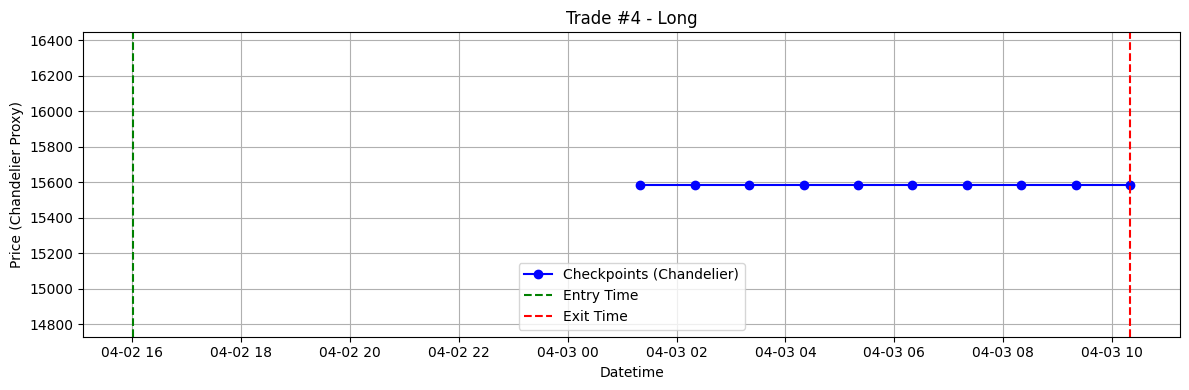

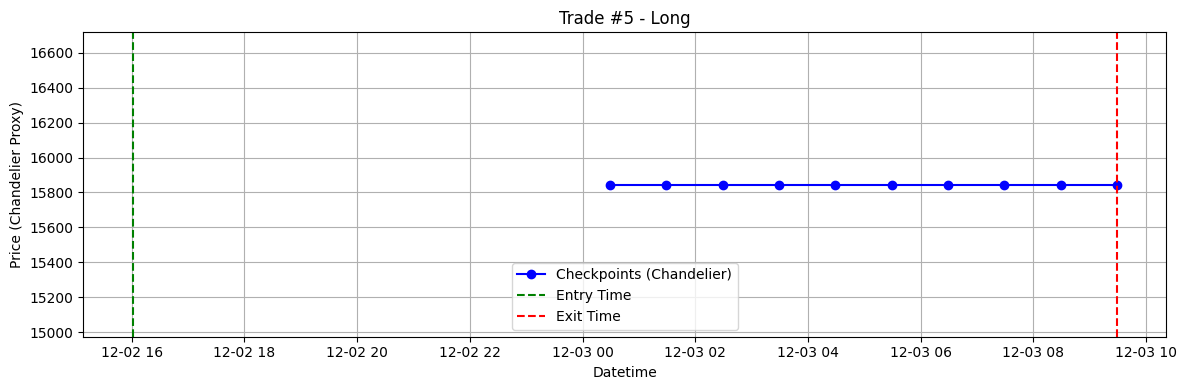

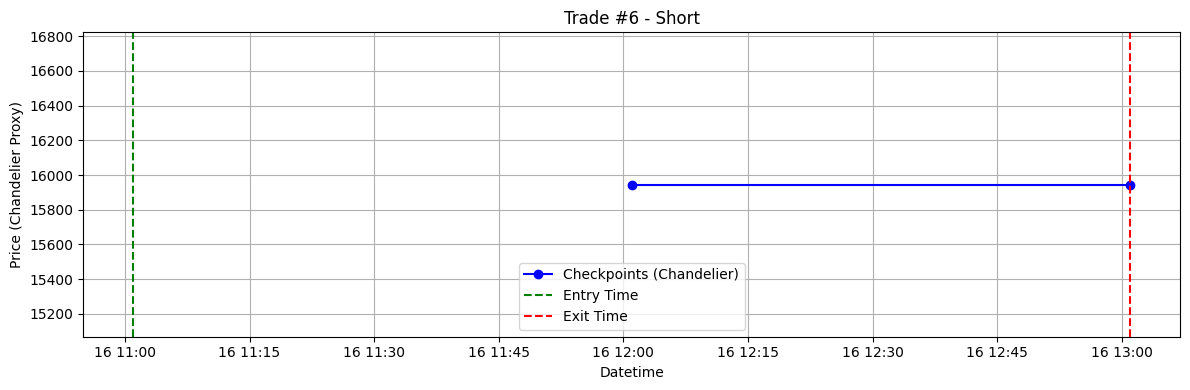

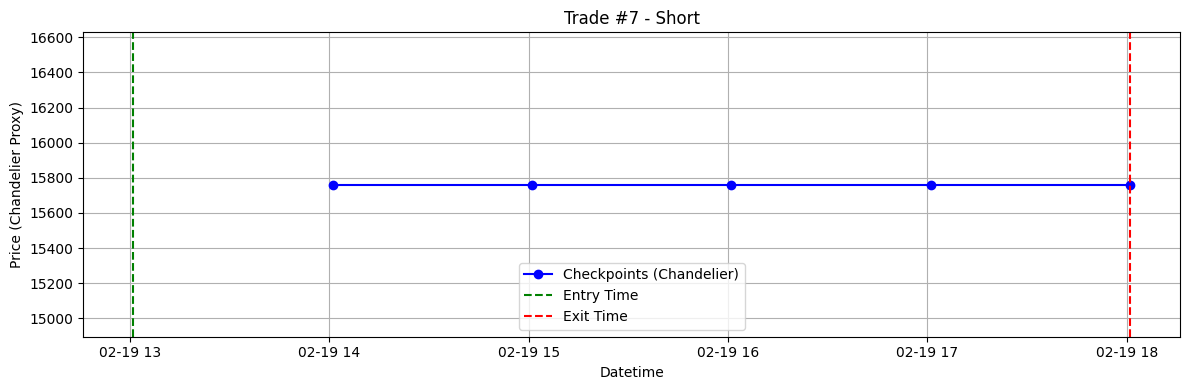

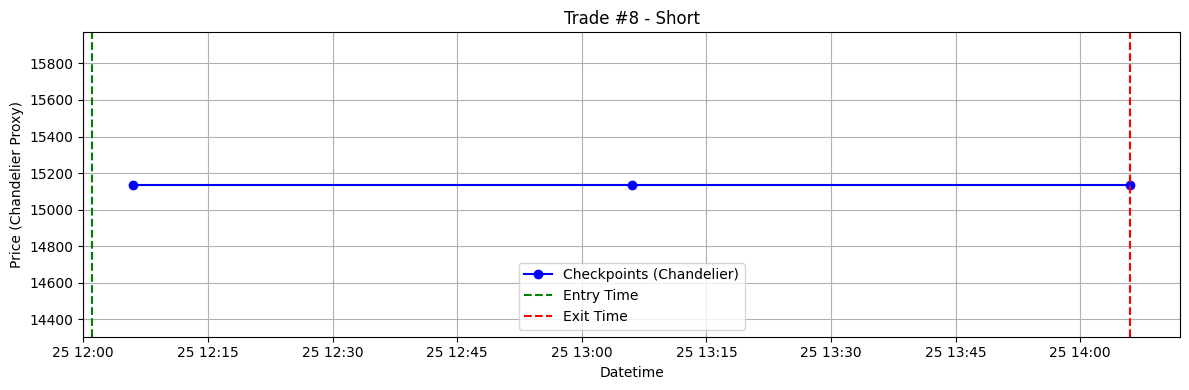

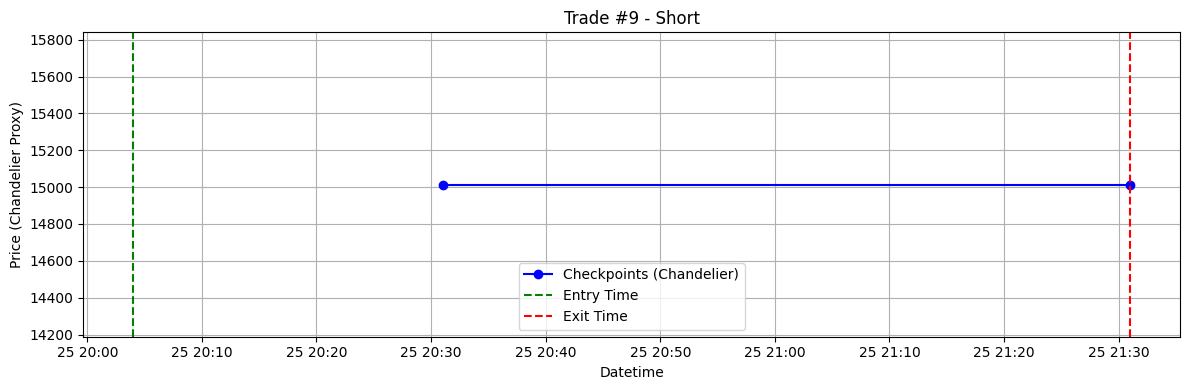

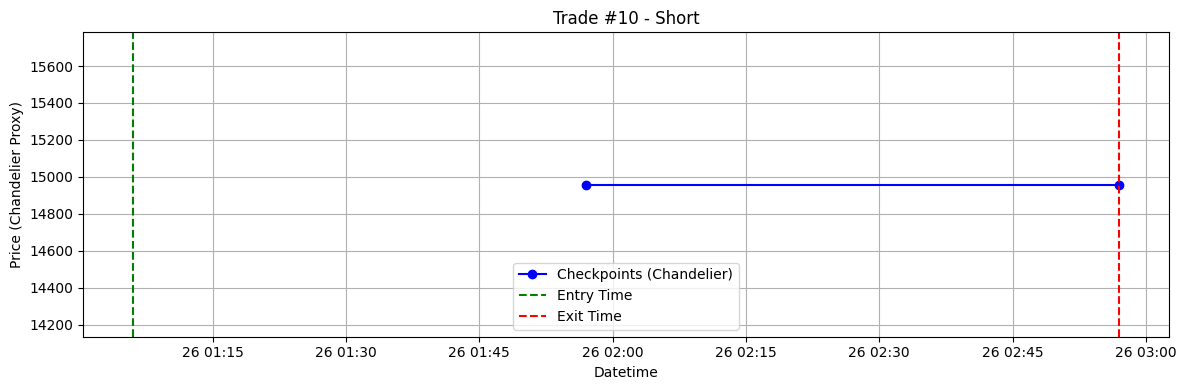

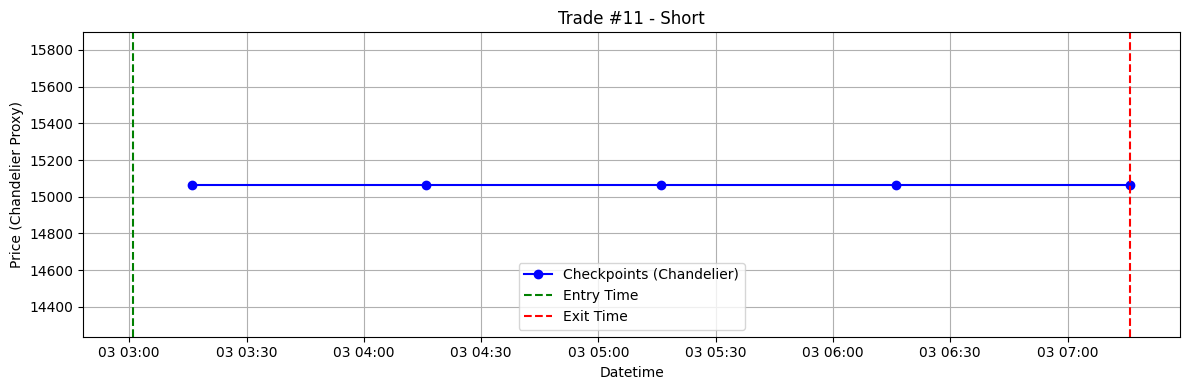

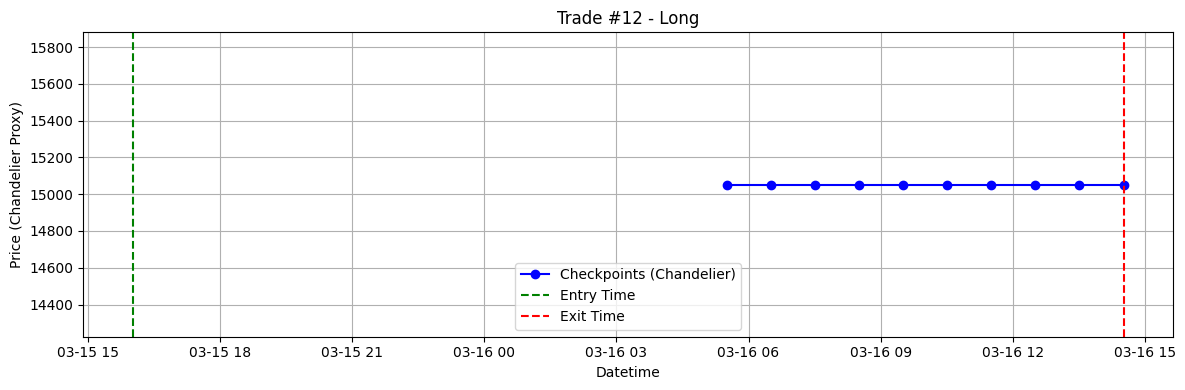

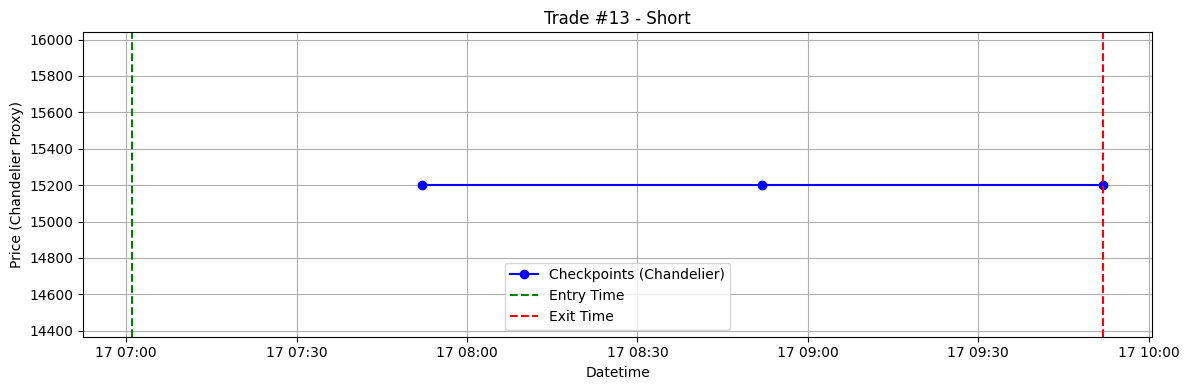

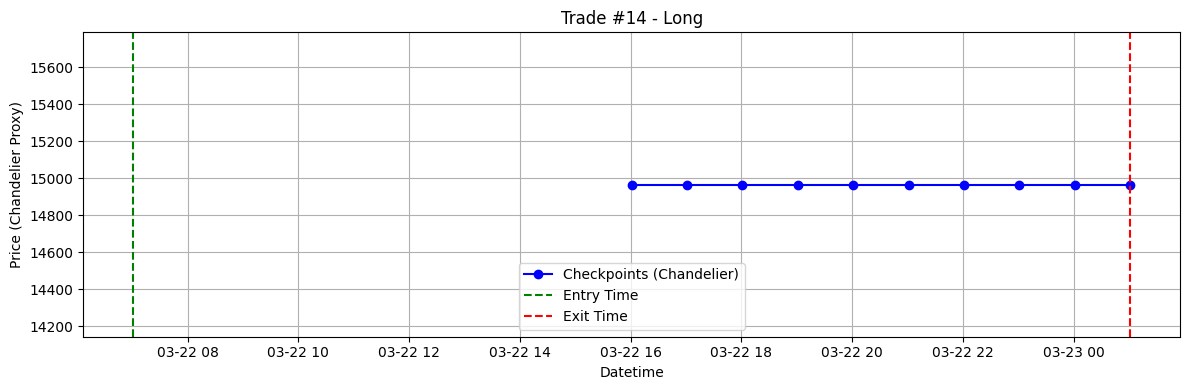

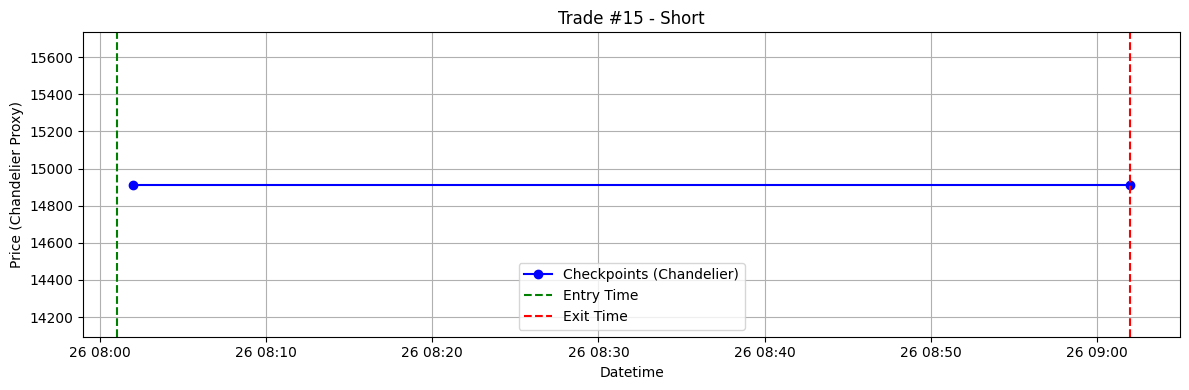

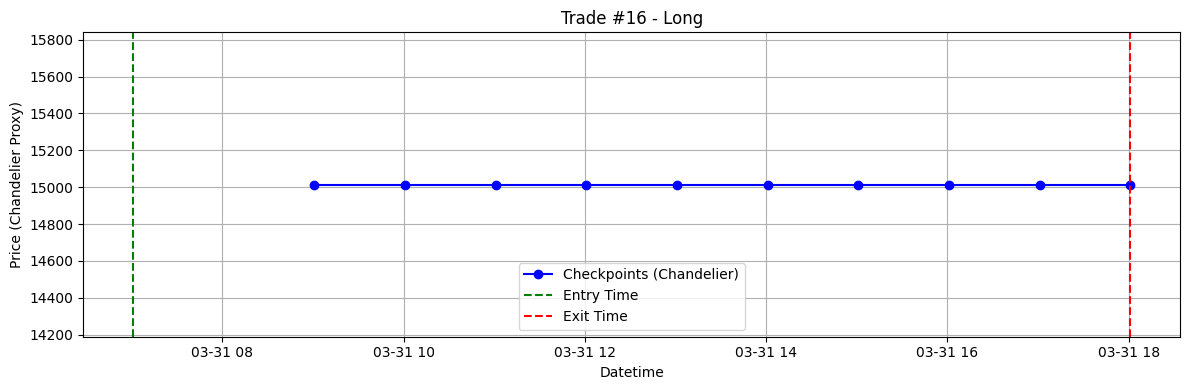

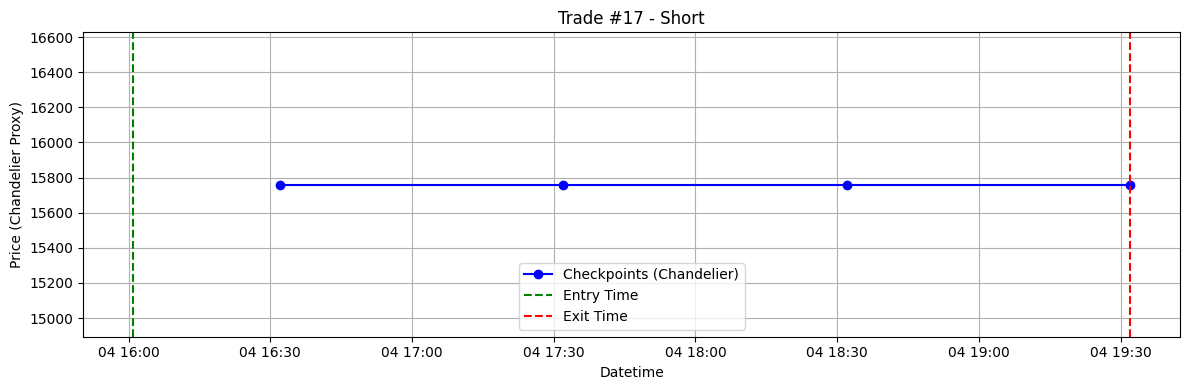

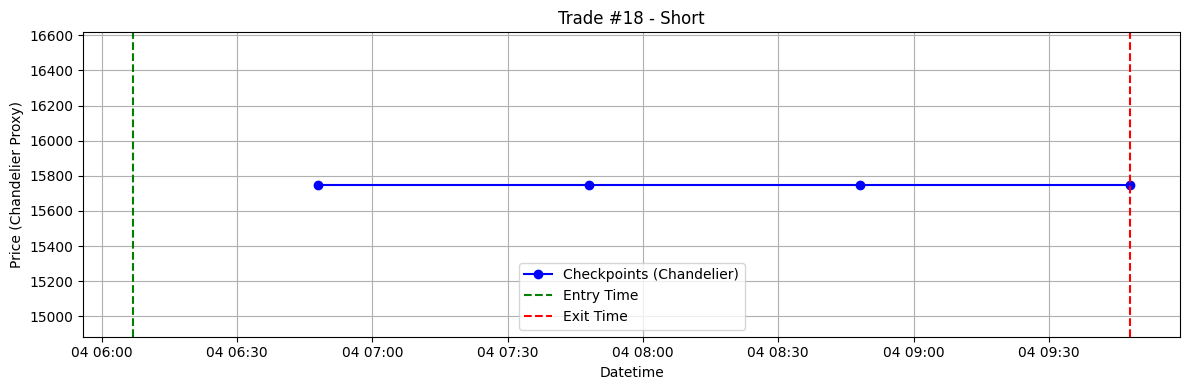

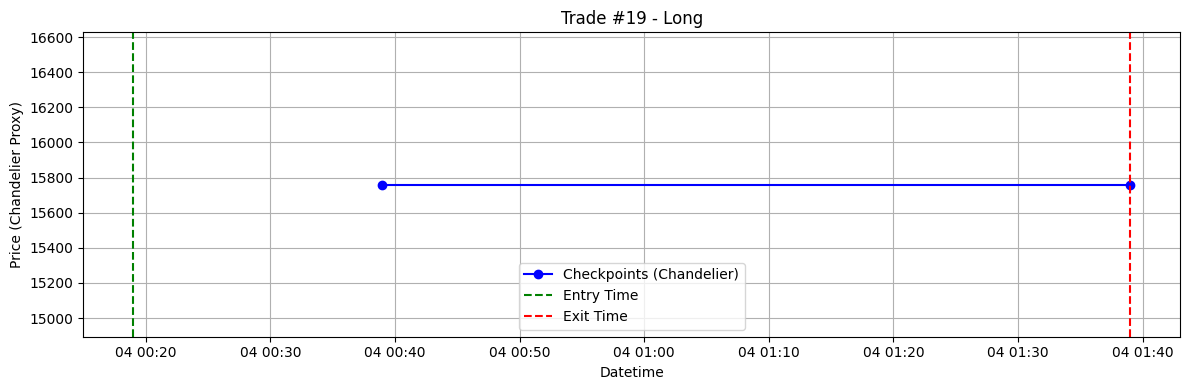

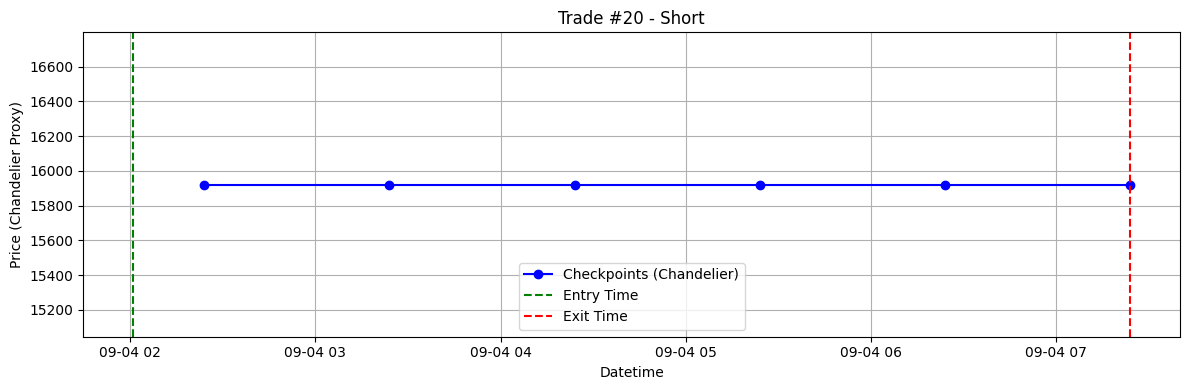

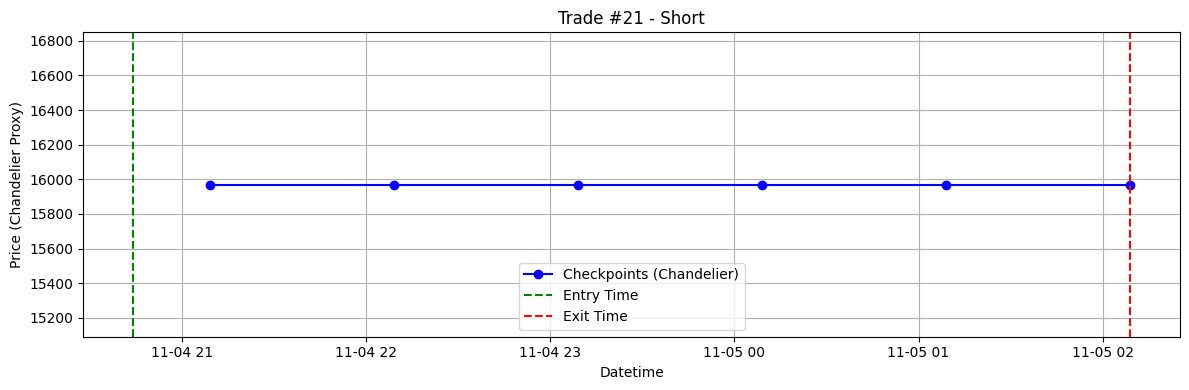

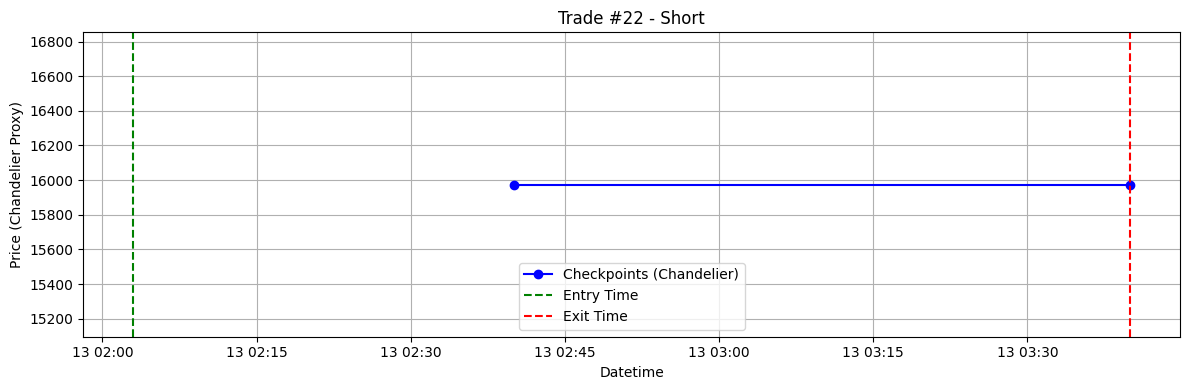

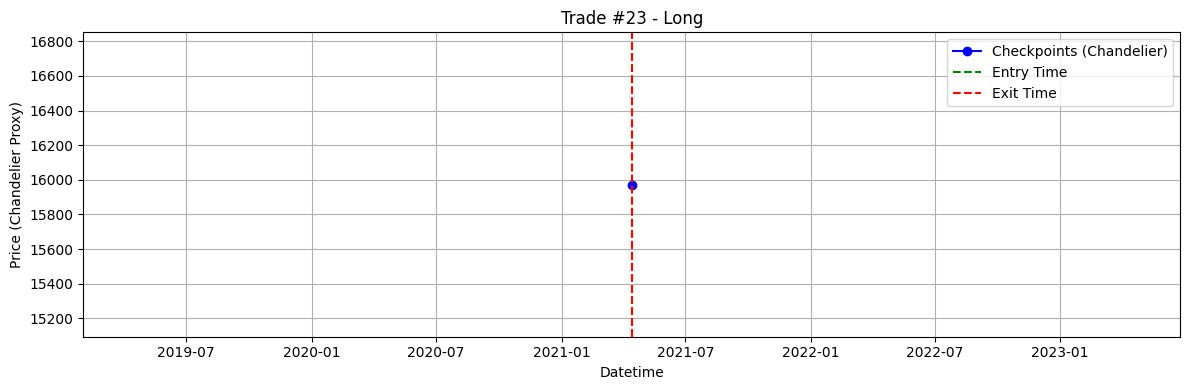

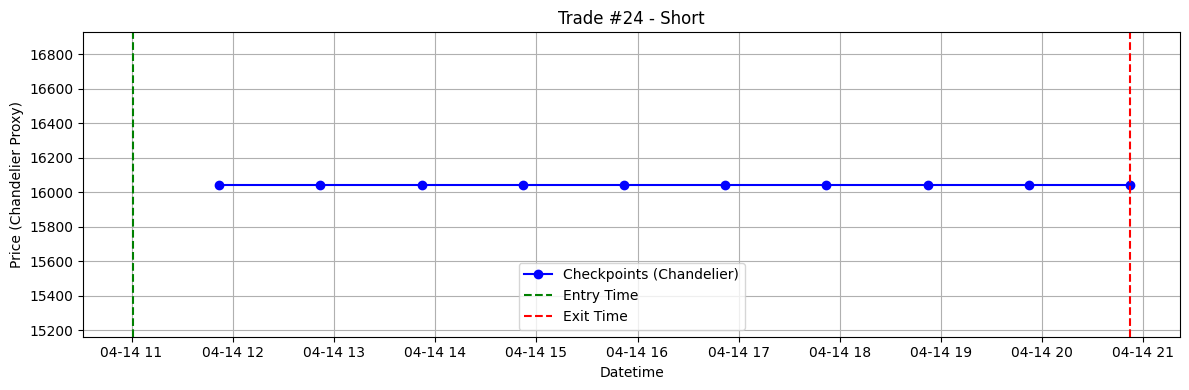

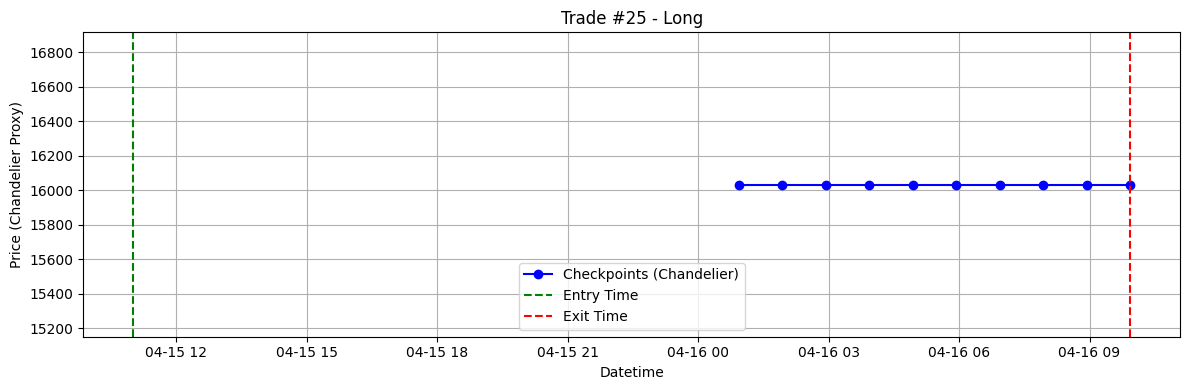

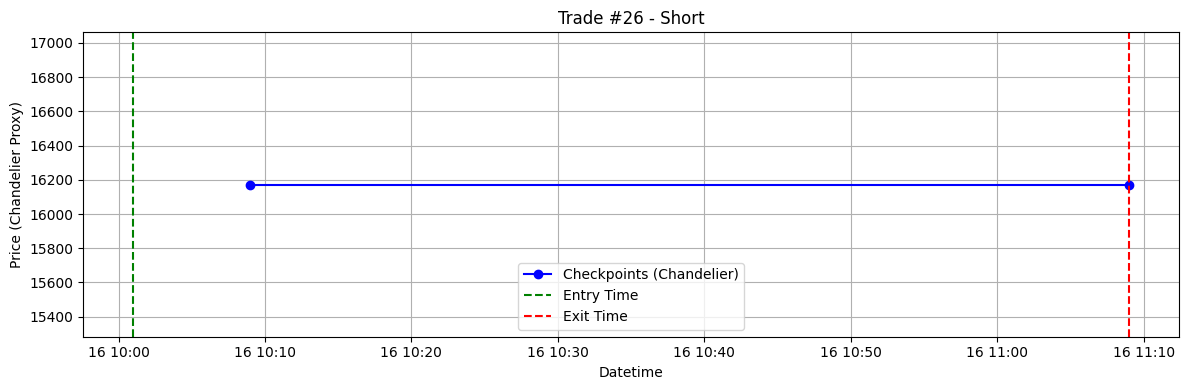

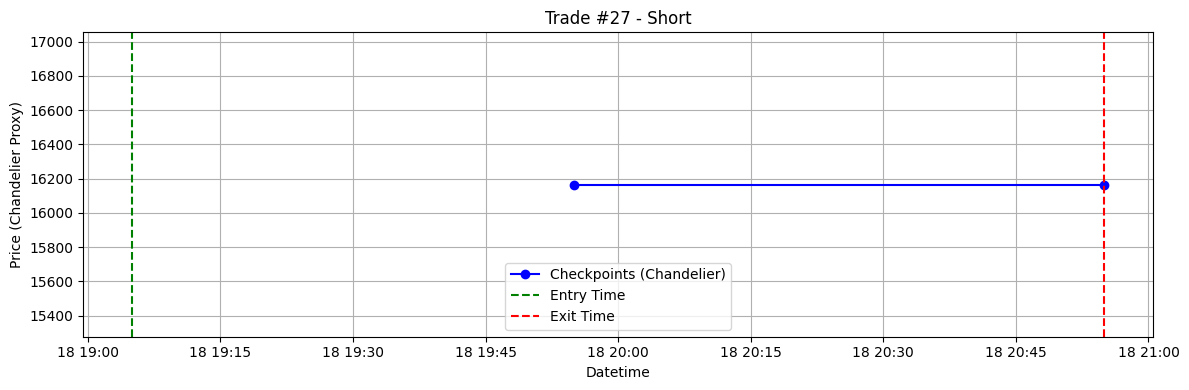

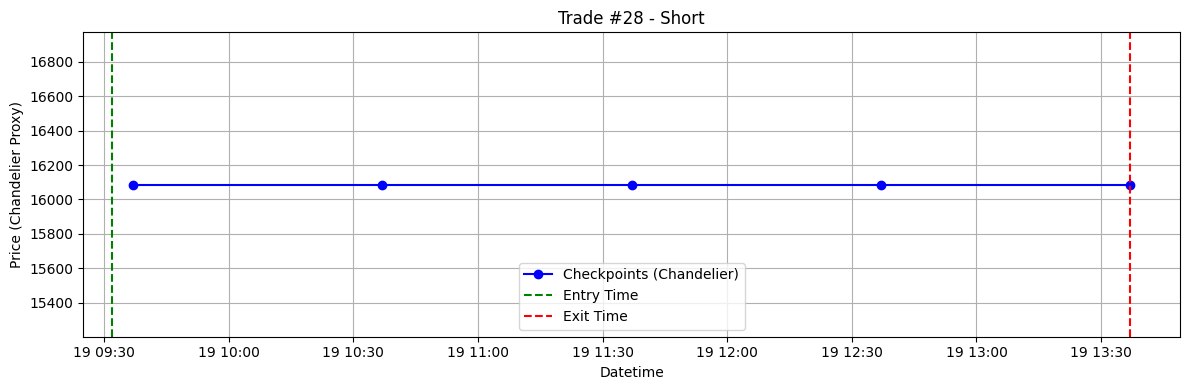

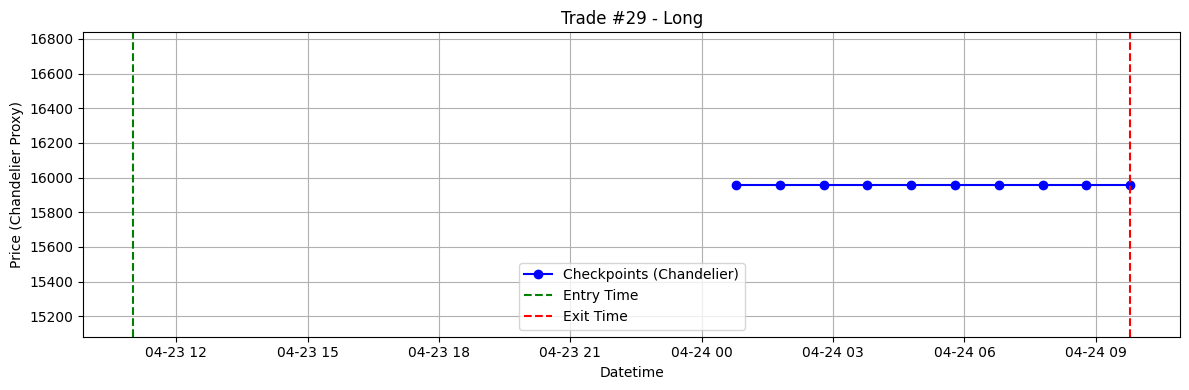

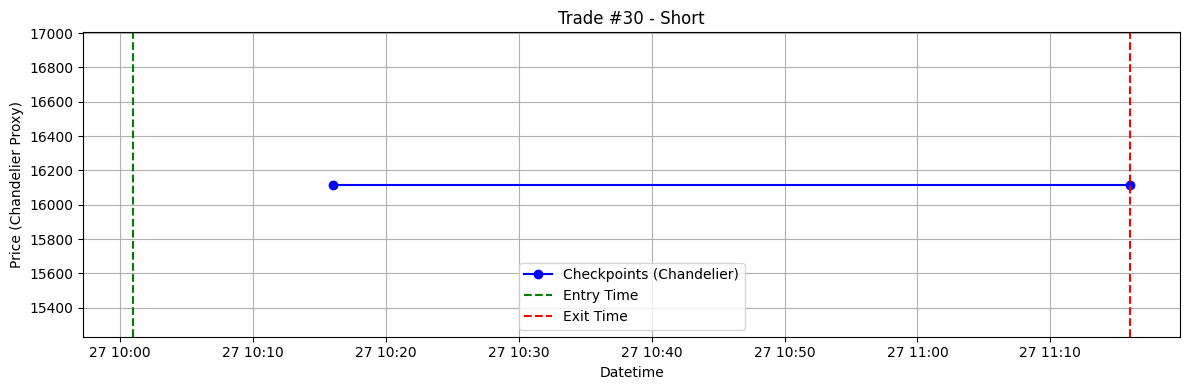

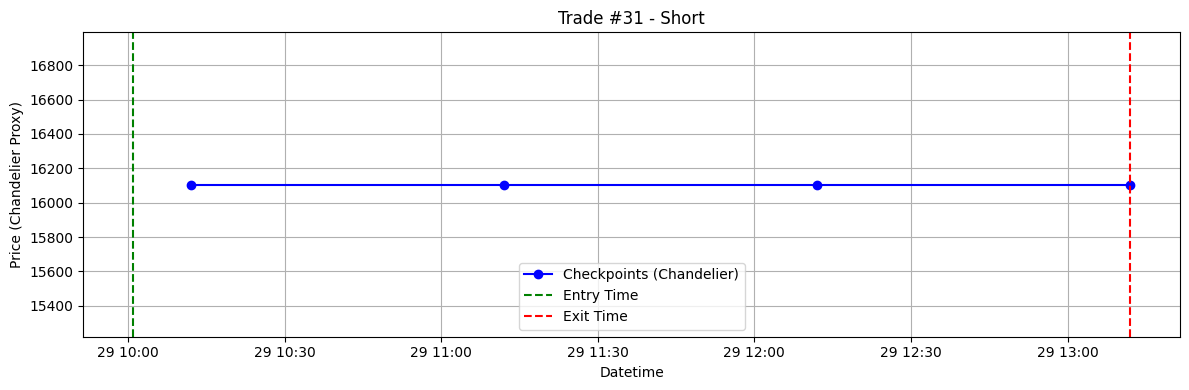

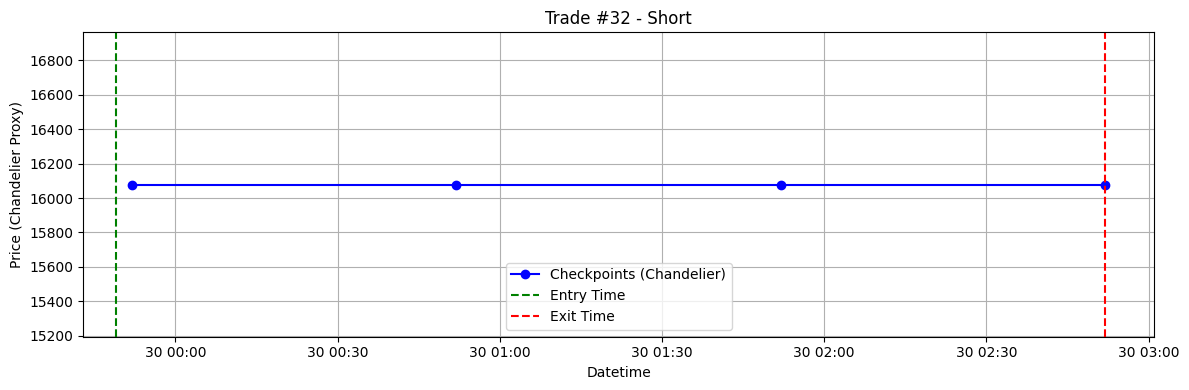

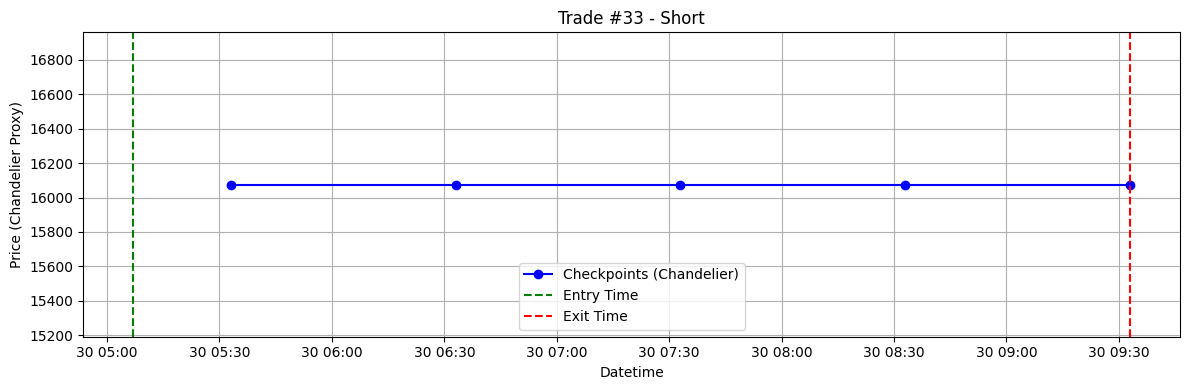

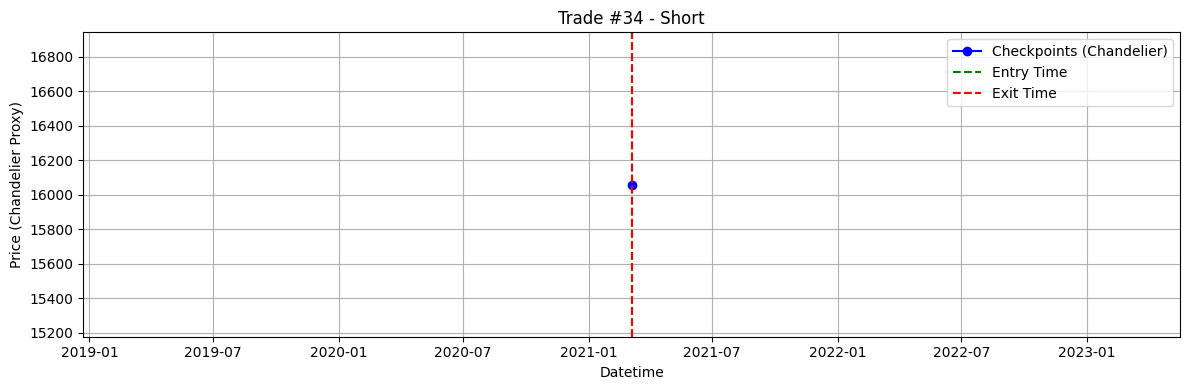

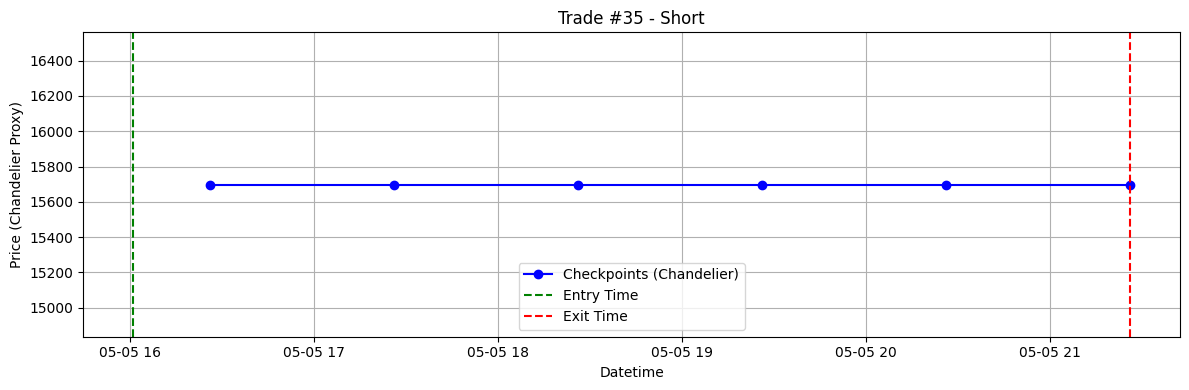

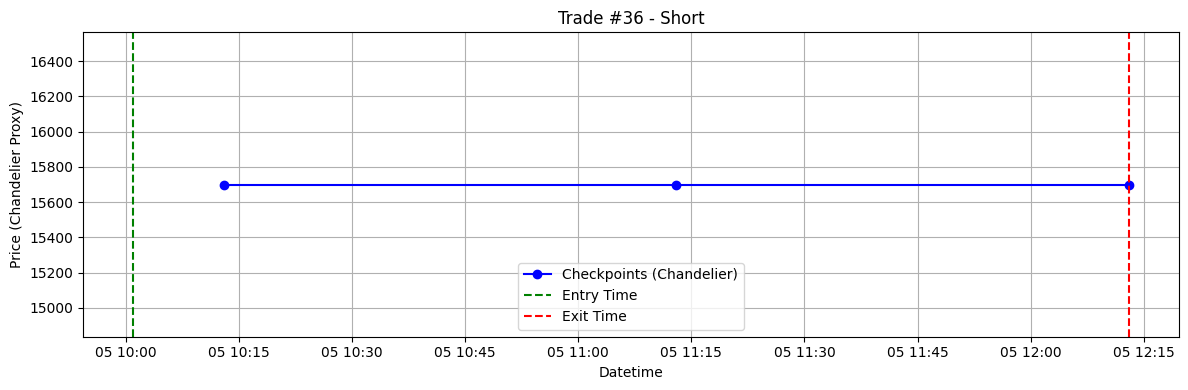

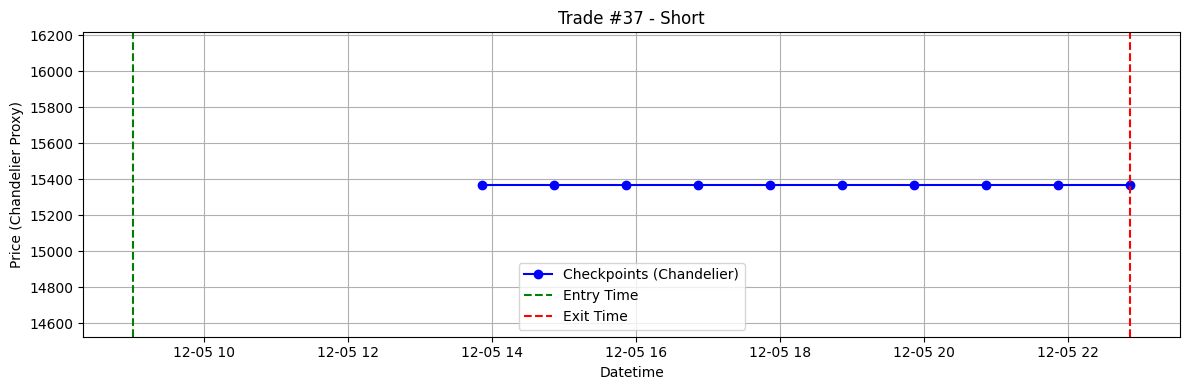

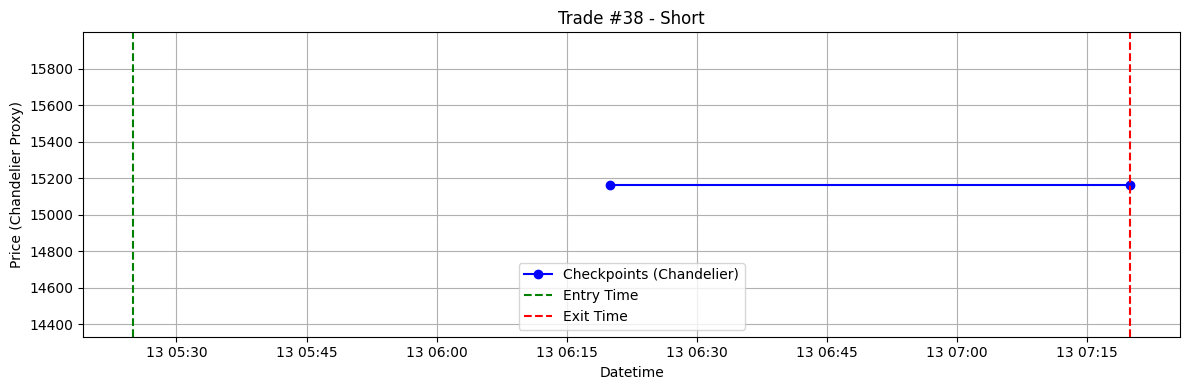

In [30]:
for i in range(len(df_)):
    plot_trade_checkpoints(df_, i)

In [31]:
trail_df = df_[['chandelier_value','Direction','Exit Price','checkpoints']]

In [32]:
trail_df.columns

Index(['chandelier_value', 'Direction', 'Exit Price', 'checkpoints'], dtype='object')

In [33]:
buffer = 10

def detect_chandelier_stop(row):
    # buffer = 0.5 * row['ATR'] (may be dynamic buffer using for all Chandelier stop)
    if row['Direction'] == 'Long':
        return row['Exit Price'] <= (row['chandelier_value'] + buffer)
    elif row['Direction'] == 'Short':
        return row['Exit Price'] >= (row['chandelier_value'] - buffer)
    else:
        return False


In [34]:
summary = {'Chandelier_Stop': 0, 'Other_Exit': 0}

for _, row in trail_df.iterrows():
    if detect_chandelier_stop(row):
        summary['Chandelier_Stop'] += 1
    else:
        summary['Other_Exit'] += 1

print("Summary:", summary)

Summary: {'Chandelier_Stop': 17, 'Other_Exit': 22}


In [35]:
df_.columns

Index(['Date', 'Timestamp', 'Direction', 'Entry Time', 'Entry Price',
       'Exit Time', 'Exit Price', 'Profit/Loss', 'Trade Duration',
       'chandelier_value', 'Entry_datetime', 'Exit_datetime', 'checkpoints'],
      dtype='object')

In [36]:
def estimate_multiplier(row):
    direction = row['Direction']
    entry = row['Entry Price']
    chandelier = row['chandelier_value']

    # Estimate pseudo-ATR as difference between entry and exit
    atr_est = abs(row['Exit Price'] - entry)

    # Approximate max_high or min_low (assume small swing around entry)
    if direction == 'Long':
        max_high = entry + atr_est * 1.2  # Assume high swung a bit above
        est_mult = (max_high - chandelier) / atr_est if atr_est != 0 else None
    elif direction == 'Short':
        min_low = entry - atr_est * 1.2
        est_mult = (chandelier - min_low) / atr_est if atr_est != 0 else None
    else:
        est_mult = None

    return est_mult

df_['estimated_multiplier'] =df_.apply(estimate_multiplier, axis=1)


In [37]:
print(df_['estimated_multiplier'].describe())

count    38.000000
mean      2.454360
std       1.544705
min       0.368182
25%       1.530050
50%       2.191660
75%       2.662044
max       6.712500
Name: estimated_multiplier, dtype: float64


In [38]:
list(df_['Date'].dt.date.unique())

[datetime.date(2021, 1, 14),
 datetime.date(2021, 1, 18),
 datetime.date(2021, 1, 22),
 datetime.date(2021, 3, 2),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 12, 2),
 datetime.date(2021, 2, 16),
 datetime.date(2021, 2, 19),
 datetime.date(2021, 2, 25),
 datetime.date(2021, 2, 26),
 datetime.date(2021, 12, 3),
 datetime.date(2021, 3, 15),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 22),
 datetime.date(2021, 3, 26),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 6, 4),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 8, 4),
 datetime.date(2021, 9, 4),
 datetime.date(2021, 11, 4),
 datetime.date(2021, 4, 13),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 15),
 datetime.date(2021, 4, 16),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 19),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 27),
 datetime.date(2021, 4, 29),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 3, 5),
 datetime.date(2021, 5, 5),
 datetime.date(2021, 10, 5),
 datetime.date(2021, 1

In [39]:
list(df2['date'].dt.date.unique())[:240]

[datetime.date(2021, 3, 26),
 datetime.date(2021, 3, 28),
 datetime.date(2021, 3, 29),
 datetime.date(2021, 3, 30),
 datetime.date(2021, 3, 31),
 datetime.date(2021, 4, 1),
 datetime.date(2021, 4, 2),
 datetime.date(2021, 4, 4),
 datetime.date(2021, 4, 5),
 datetime.date(2021, 4, 6),
 datetime.date(2021, 4, 7),
 datetime.date(2021, 4, 8),
 datetime.date(2021, 4, 9),
 datetime.date(2021, 4, 11),
 datetime.date(2021, 4, 12),
 datetime.date(2021, 4, 13),
 datetime.date(2021, 4, 14),
 datetime.date(2021, 4, 15),
 datetime.date(2021, 4, 16),
 datetime.date(2021, 4, 18),
 datetime.date(2021, 4, 19),
 datetime.date(2021, 4, 20),
 datetime.date(2021, 4, 21),
 datetime.date(2021, 4, 22),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 25),
 datetime.date(2021, 4, 26),
 datetime.date(2021, 4, 27),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 4, 29),
 datetime.date(2021, 4, 30),
 datetime.date(2021, 5, 2),
 datetime.date(2021, 5, 3),
 datetime.date(2021, 5, 4),
 datetime.date(2021, 5, 5

In [40]:
df1_ = df2[df2['date'] <= pd.to_datetime('2022-01-02 23:59:59')]

In [41]:
print(max(df1_['date']),min(df1_['date']))

2021-07-28 22:12:00 2021-03-26 04:01:00


In [42]:
print(max(df_['Date']),min(df_['Date']))

2021-12-05 00:00:00 2021-01-14 00:00:00


In [43]:
df_ = df_.sort_values(by=['Date'], ascending=True)

In [44]:
df_['Date'].dt.date.unique()

array([datetime.date(2021, 1, 14), datetime.date(2021, 1, 18),
       datetime.date(2021, 1, 22), datetime.date(2021, 2, 16),
       datetime.date(2021, 2, 19), datetime.date(2021, 2, 25),
       datetime.date(2021, 2, 26), datetime.date(2021, 3, 2),
       datetime.date(2021, 3, 5), datetime.date(2021, 3, 15),
       datetime.date(2021, 3, 17), datetime.date(2021, 3, 22),
       datetime.date(2021, 3, 26), datetime.date(2021, 3, 31),
       datetime.date(2021, 4, 2), datetime.date(2021, 4, 13),
       datetime.date(2021, 4, 14), datetime.date(2021, 4, 15),
       datetime.date(2021, 4, 16), datetime.date(2021, 4, 18),
       datetime.date(2021, 4, 19), datetime.date(2021, 4, 23),
       datetime.date(2021, 4, 27), datetime.date(2021, 4, 29),
       datetime.date(2021, 4, 30), datetime.date(2021, 5, 5),
       datetime.date(2021, 5, 13), datetime.date(2021, 6, 4),
       datetime.date(2021, 7, 4), datetime.date(2021, 8, 4),
       datetime.date(2021, 9, 4), datetime.date(2021, 10, 5),


In [45]:
df_.head()

,Date,Timestamp,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Profit/Loss,Trade Duration,chandelier_value,Entry_datetime,Exit_datetime,checkpoints,estimated_multiplier
0,2021-01-14,16:00:00,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,15090.25,2021-01-14 16:01:00,2021-01-15 02:50:00,"[2021-01-15 02:50:00, 2021-01-15 01:50:00, 202...",4.392308
1,2021-01-18,20:00:00,Long,20:07:00,15018.00,09:43:00,15435.25,8345,02:13:36:00,14948.75,2021-01-18 20:07:00,2021-01-19 09:43:00,"[2021-01-19 09:43:00, 2021-01-19 08:43:00, 202...",1.365968
2,2021-01-22,05:00:00,Short,05:01:00,15478.25,09:29:00,15493.75,-310,00:04:28:00,15504.25,2021-01-22 05:01:00,2021-01-22 09:29:00,"[2021-01-22 09:29:00, 2021-01-22 08:29:00, 202...",2.877419
10,2021-02-16,11:00:00,Short,11:01:00,15984.25,13:01:00,15927.50,1135,00:02:00:00,15945.50,2021-02-16 11:01:00,2021-02-16 13:01:00,"[2021-02-16 13:01:00, 2021-02-16 12:01:00]",0.517181
12,2021-02-19,13:00:00,Short,13:01:00,15733.50,18:01:00,15758.00,-490,02:05:00:00,15761.75,2021-02-19 13:01:00,2021-02-19 18:01:00,"[2021-02-19 18:01:00, 2021-02-19 17:01:00, 202...",2.353061


Here Now Work With df_(target_data) and
df1_(minutes by minutes data for merging) and df_ have starting from 1-2021 but in df1_ start from 3-2021 so we have to deduct the rest and make them null or Zeo

In [103]:
df2_ = df_.copy()

In [104]:
df2_['Trade Id'] = range(1, len(df2_) + 1)


In [105]:
df1_.columns

Index(['date', 'High', 'Low', 'Open', 'Close', 'Volume', 'PeriodVolume', 'atr',
       'Chandelier_Long', 'Chandelier_Short', 'Exit_Long', 'Exit_Short'],
      dtype='object')

In [106]:
df2_exploded = df2_.explode('checkpoints')

In [107]:
df2_exploded = df2_exploded.merge(
    df1_,
    left_on = 'checkpoints',
    right_on = 'date',
    how = 'left'
)

In [108]:
df2_exploded.columns

Index(['Date', 'Timestamp', 'Direction', 'Entry Time', 'Entry Price',
       'Exit Time', 'Exit Price', 'Profit/Loss', 'Trade Duration',
       'chandelier_value', 'Entry_datetime', 'Exit_datetime', 'checkpoints',
       'estimated_multiplier', 'Trade Id', 'date', 'High', 'Low', 'Open',
       'Close', 'Volume', 'PeriodVolume', 'atr', 'Chandelier_Long',
       'Chandelier_Short', 'Exit_Long', 'Exit_Short'],
      dtype='object')

In [109]:
df2_exploded.drop(columns=['Volume','PeriodVolume','atr','Chandelier_Long','Chandelier_Short','Exit_Long','Exit_Short'],inplace=True)

In [110]:
df3_ = df2_exploded.copy()

In [111]:
df3_.drop(columns=['data','chandelier_value'],inplace=True,errors='ignore')
df3_.fillna(0,inplace=True)

<ipython-input-111-5c925cfcb9af>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df3_.fillna(0,inplace=True)


In [112]:
df3_.shape

(210, 19)

In [113]:
df3_[['High','Low','Open']].describe()

,High,Low,Open
count,210.000000,210.000000,210.000000
mean,4836.053571,4833.719048,4834.734524
std,7324.576919,7321.070421,7322.602721
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,15291.062500,15281.062500,15285.312500
max,16215.000000,16209.750000,16211.250000


In [114]:
def calculate_atr(df3_,period=9):
  df3_['H-L'] = df3_['High'] - df3_['Low']
  df3_['H-PC'] = abs(df3_['High'] - df3_['Close'].shift(1))
  df3_['L-PC'] = abs(df3_['Low'] - df3_['Close'].shift(1))
  df3_['TR'] = df3_[['H-L','H-PC','L-PC']].max(axis=1)
  df3_['ATR'] = df3_['TR'].rolling(window=period).mean()
  return df3_

In [115]:
df4_ = calculate_atr(df3_)

In [117]:
atr_period=9
df4_['Chandelier_Long'] = df4_["High"].rolling(window=atr_period).max() - df4_['ATR']*3.9
df4_['Chandelier_Short'] = df4_["Low"].rolling(window=atr_period).min() + df4_['ATR']*1.5

In [118]:
def is_varified_chandelier_exit(row):
  if row['Direction'] == 'Long':
    return row['Close'] <= row['Chandelier_Long']
  elif row['Direction'] == 'Short':
    return row['Close'] >= row['Chandelier_Short']
  else:
    return False
df4_['Varified_chandelier_stop'] = df4_.apply(is_varified_chandelier_exit,axis=1)

In [119]:
df4_['Varified_chandelier_stop'].value_counts()

,count
Varified_chandelier_stop,
True,153
False,57


In [74]:
df4_.drop(columns=['date'],inplace=True)

Number of trades with no data: 129


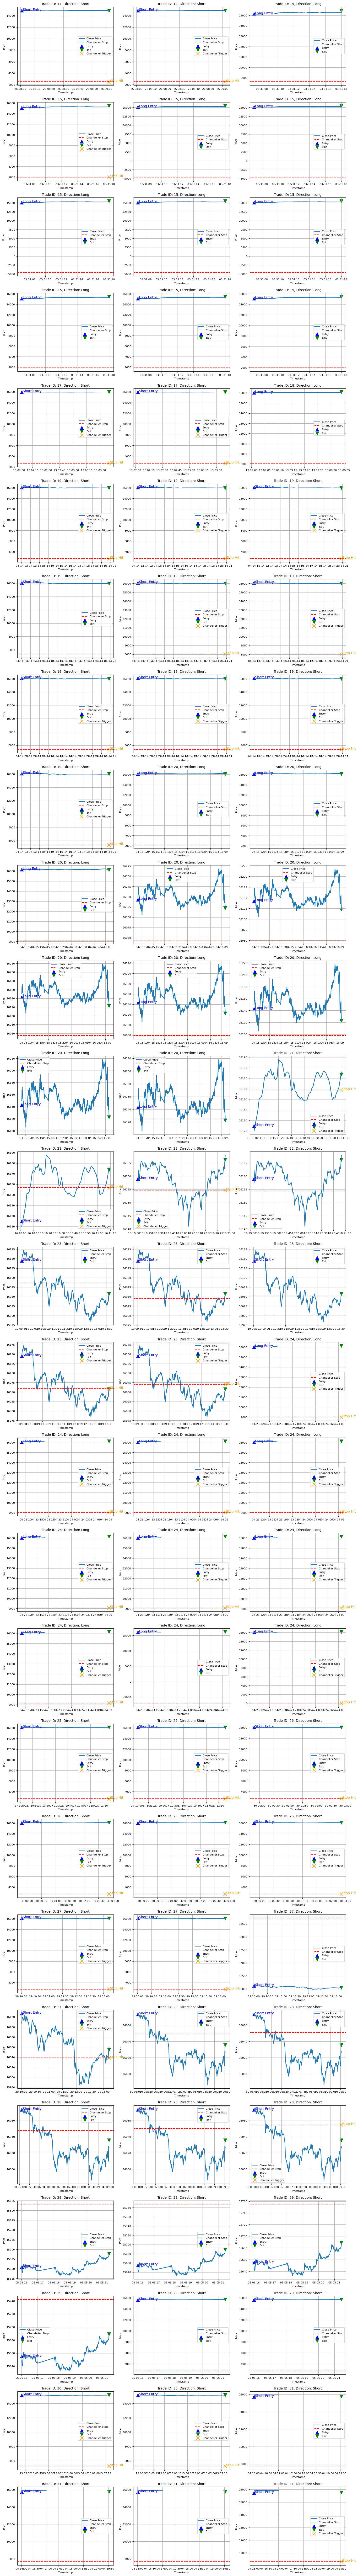

In [120]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_trade(row, fig, ax):  # Add fig and ax as arguments
    chandelier_value = row['Chandelier_Long'] if row['Direction'] == 'Long' else row['Chandelier_Short']

    entry_time = pd.to_datetime(row['Entry_datetime'])
    exit_time = pd.to_datetime(row['Exit_datetime'])

    # Filter data in the trade's time window
    data = df1_[(df1_['date'] >= entry_time) & (df1_['date'] <= exit_time)]

    if data.empty:
        print("No data available in the selected time range.")
        return

    # Plot price on the provided axes
    ax.plot(data['date'], data['Close'], label='Close Price', linewidth=2)

    # Plot Chandelier Stop line
    ax.axhline(y=chandelier_value, color='red', linestyle='--', label='Chandelier Stop')

    # Mark entry and exit points
    ax.scatter(entry_time, row['Entry Price'], color='blue', label='Entry', marker='^', s=100)
    ax.scatter(exit_time, row['Exit Price'], color='green', label='Exit', marker='v', s=100)

    # Annotate the direction
    ax.text(entry_time, row['Entry Price'], f" {row['Direction']} Entry", fontsize=10, color='blue')

    # Optional: mark the Chandelier Stop trigger point if available
    if 'Varified_chandelier_stop' in row and row['Varified_chandelier_stop']:
        ax.scatter(exit_time, chandelier_value, color='orange', label='Chandelier Trigger', marker='x', s=100)
        ax.text(exit_time, chandelier_value, ' Stop Hit', fontsize=10, color='orange')

    # Formatting
    ax.set_title(f"Trade ID: {row['Trade Id']}, Direction: {row['Direction']}", fontsize=10)  # Smaller title
    ax.set_xlabel('Timestamp', fontsize=8)  # Smaller labels
    ax.set_ylabel('Price', fontsize=8)
    ax.legend(fontsize=8)  # Smaller legend
    ax.tick_params(axis='both', which='major', labelsize=8)  # Smaller ticks
    ax.grid(True)

# Create subplots
no_data_count = 0

# Create subplots (adjust figsize and layout as needed)
num_plots = len(df4_)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.tight_layout(pad=3.0)

# Plot index for the subplots
plot_index = 0

# Iterate through data and plot on subplots
for i, row in df4_.iterrows():
    chandelier_value = row['Chandelier_Long'] if row['Direction'] == 'Long' else row['Chandelier_Short']
    entry_time = pd.to_datetime(row['Entry_datetime'])
    exit_time = pd.to_datetime(row['Exit_datetime'])

    # Filter data in the trade's time window
    data = df1_[(df1_['date'] >= entry_time) & (df1_['date'] <= exit_time)]

    if data.empty:
        no_data_count += 1
        continue  # Skip plotting if no data

    # Get the current subplot axis
    ax = axes.flat[plot_index]
    plot_index += 1  # Increment plot index

    # Call plot_trade to create the graph
    plot_trade(row, fig, ax)

# Print the number of trades with no data
print(f"Number of trades with no data: {no_data_count}")


# Remove any remaining empty subplots
for i in range(plot_index, len(axes.flat)):
    fig.delaxes(axes.flat[i])

plt.show()

In [84]:
def describe_trade_data(df):
    print("🔍 TRADE DATA SUMMARY\n" + "-"*40)

    # Total trades
    print(f"Total trades: {len(df)}")

    # Long vs Short trades
    print("\n📈 Trade Directions:")
    print(df['Direction'].value_counts())

    # Missing values
    print("\n❗ Missing Values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    # Verified Chandelier Stop
    if 'Varified_chandelier_stop' in df.columns:
        print("\n✅ Verified Chandelier Stops:")
        print(df['Varified_chandelier_stop'].value_counts())
    else:
        print("\n⚠️ 'Varified_chandelier_stop' column not found.")

    # Profit/Loss basic stats
    if 'Profit/Loss' in df.columns:
        print("\n💸 Profit/Loss Summary:")
        print(df['Profit/Loss'].describe())
    else:
        print("\n⚠️ 'Profit/Loss' column not found.")

    # Total exits by chandelier stop
    if 'Varified_chandelier_stop' in df.columns:
        chandelier_exits = df[df['Varified_chandelier_stop'] == True]
        print(f"\n📉 Exits due to Chandelier Stop: {len(chandelier_exits)}")
    print("-"*40)


In [121]:
describe_trade_data(df4_)

🔍 TRADE DATA SUMMARY
----------------------------------------
Total trades: 210

📈 Trade Directions:
Direction
Short    127
Long      83
Name: count, dtype: int64

❗ Missing Values:
H-PC                1
L-PC                1
ATR                 8
Chandelier_Long     8
Chandelier_Short    8
dtype: int64

✅ Verified Chandelier Stops:
Varified_chandelier_stop
True     153
False     57
Name: count, dtype: int64

💸 Profit/Loss Summary:
count     210.000000
mean     1271.047619
std      2307.629140
min     -1210.000000
25%      -310.000000
50%       615.000000
75%      1750.000000
max      8345.000000
Name: Profit/Loss, dtype: float64

📉 Exits due to Chandelier Stop: 153
----------------------------------------


In [126]:
df4_.columns

Index(['Date', 'Timestamp', 'Direction', 'Entry Time', 'Entry Price',
       'Exit Time', 'Exit Price', 'Profit/Loss', 'Trade Duration',
       'Entry_datetime', 'Exit_datetime', 'checkpoints',
       'estimated_multiplier', 'Trade Id', 'date', 'High', 'Low', 'Open',
       'Close', 'H-L', 'H-PC', 'L-PC', 'TR', 'ATR', 'Chandelier_Long',
       'Chandelier_Short', 'Varified_chandelier_stop'],
      dtype='object')

In [125]:
df4_.sample(5)

,Date,Timestamp,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Profit/Loss,Trade Duration,Entry_datetime,...,Open,Close,H-L,H-PC,L-PC,TR,ATR,Chandelier_Long,Chandelier_Short,Varified_chandelier_stop
29,2021-02-19,13:00:00,Short,13:01:00,15733.50,18:01:00,15758.00,-490,02:05:00:00,2021-02-19 13:01:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,True
164,2021-07-04,06:00:00,Short,06:07:00,15750.25,09:48:00,15733.50,335,00:03:41:00,2021-07-04 06:07:00,...,0.0,0.0,0.0,15922.5,15922.5,15922.5,8647.666667,-17801.150000,12971.500000,False
87,2021-04-02,16:00:00,Long,16:01:00,15701.25,10:20:00,15830.75,2590,05:18:19:00,2021-04-02 16:01:00,...,0.0,0.0,0.0,0.0,0.0,0.0,1706.722222,8637.033333,2560.083333,True
58,2021-03-15,16:00:00,Long,16:01:00,15229.25,14:31:00,15261.75,650,00:22:30:00,2021-03-15 16:01:00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,True
4,2021-01-14,16:00:00,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,False


In [127]:
df4_cleaned = df4_.drop(columns=['Timestamp', 'date', 'High', 'Low', 'Open', 'Close', 'H-L', 'H-PC', 'L-PC', 'TR', 'ATR'])

columns_order = [
    'Trade Id', 'Date', 'Direction',
    'Entry Time', 'Entry Price', 'Exit Time', 'Exit Price',
    'Profit/Loss', 'Trade Duration',
    'Entry_datetime', 'Exit_datetime',
    'Chandelier_Long', 'Chandelier_Short', 'Varified_chandelier_stop',
    'checkpoints', 'estimated_multiplier'
]

df4_cleaned = df4_cleaned[columns_order]


In [129]:
df4_cleaned.head(10)

,Trade Id,Date,Direction,Entry Time,Entry Price,Exit Time,Exit Price,Profit/Loss,Trade Duration,Entry_datetime,Exit_datetime,Chandelier_Long,Chandelier_Short,Varified_chandelier_stop,checkpoints,estimated_multiplier
0,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-15 02:50:00,4.392308
1,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-15 01:50:00,4.392308
2,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-15 00:50:00,4.392308
3,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-14 23:50:00,4.392308
4,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-14 22:50:00,4.392308
5,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-14 21:50:00,4.392308
6,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-14 20:50:00,4.392308
7,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,NaN,NaN,False,2021-01-14 19:50:00,4.392308
8,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,0.0,0.0,True,2021-01-14 18:50:00,4.392308
9,1,2021-01-14,Short,16:01:00,15048.75,02:50:00,15035.75,260,00:10:49:00,2021-01-14 16:01:00,2021-01-15 02:50:00,0.0,0.0,True,2021-01-14 17:50:00,4.392308


In [130]:
df4_cleaned.to_excel("Output_clean_trade_1.xlsx", index=False)
